# Overlap less or more than % (examples)

change function to sharedProportion
add new code to github

In [6]:
#libraries
import geopandas as gpd
import psycopg2
import pprint
%matplotlib inline

In [7]:
#connect to database
conn = psycopg2.connect('dbname=gis user=carlos')
cursor = conn.cursor()

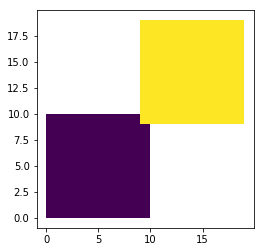

In [8]:
#create polygons that overlap exactly 10%
query = 'SELECT \
    ST_MakeBox2D(ST_Point(0,0), ST_Point(10,10))::geometry AS geom, \
    1 AS color \
    UNION \
    SELECT \
    ST_MakeBox2D(ST_Point(9,9), ST_Point(19,19))::geometry AS geom, \
    2 AS color;'
df = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='geom')
df.plot(column='color')

In [9]:
#test overlap by less than 10%
query = 'SELECT \
     overlapLessThan( \
     ST_MakeBox2D(ST_Point(0,0), ST_Point(10,10))::geometry, \
     ST_MakeBox2D(ST_Point(9,9), ST_Point(19,19))::geometry, \
     .10)'
cursor.execute(query)
rows = cursor.fetchall()  
pprint.pprint(rows)

[(True,)]


In [10]:
#test overlap by less than 1%
query = 'SELECT \
     overlapLessThan( \
     ST_MakeBox2D(ST_Point(0,0), ST_Point(10,10))::geometry, \
     ST_MakeBox2D(ST_Point(9,9), ST_Point(19,19))::geometry, \
     .01);'
cursor.execute(query)
rows = cursor.fetchall()  
pprint.pprint(rows)

[(True,)]


In [11]:
#test overlap by more than 10%
query = 'SELECT \
     overlapMoreThan( \
     ST_MakeBox2D(ST_Point(0,0), ST_Point(10,10))::geometry, \
     ST_MakeBox2D(ST_Point(9,9), ST_Point(19,19))::geometry, \
     .10);'
cursor.execute(query)
rows = cursor.fetchall()  
pprint.pprint(rows)

[(False,)]


In [12]:
#test overlap by more than 0.9%
query = 'SELECT \
     overlapMoreThan( \
     ST_MakeBox2D(ST_Point(0,0), ST_Point(10,10))::geometry, \
     ST_MakeBox2D(ST_Point(9,9), ST_Point(19,19))::geometry, \
     .009);'
cursor.execute(query)
rows = cursor.fetchall()  
pprint.pprint(rows)

[(True,)]


In [13]:
conn.close() 

# Simplify map

In [18]:
#libraries
import geopandas as gpd
import psycopg2
import pprint
%matplotlib inline

In [24]:
#connect to database
conn = psycopg2.connect('dbname=gis user=carlos')
cursor = conn.cursor()

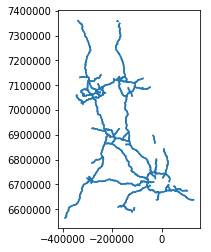

In [25]:
#display roads
query = "SELECT \
    * \
    FROM \
    public.planet_osm_roads \
    WHERE \
    planet_osm_roads.highway IN ('motorway', 'motorway_link');"
df = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='way')
df.plot()

In [26]:
#too many lines for such small map
df["osm_id"].count()

12043

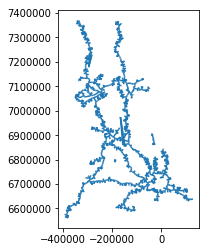

In [27]:
#simplifying map
query = "SELECT \
  simplifyMap(ST_Collect(planet_osm_roads.way), 10000) AS geom \
  FROM \
  public.planet_osm_roads \
  WHERE \
  planet_osm_roads.highway IN ('motorway', 'motorway_link');"
df = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='geom')
df.plot()

In [ ]:
#too many lines for such small map
df["osm_id"].count()